In [172]:
# 重置所有变量，-f 不询问
%reset -f

# 神经网络手写体数字识别

In [1]:
import sys
# 添加模块导入路径
sys.path.append('/home/zzzzer/Documents/code/python/myworld/deepeasy')

import struct
# 重新加载模块
# 为了使外部代码修改生效
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import deepeasy.nnet as nnet
from deepeasy.datasets.minst import load_minst

## 读取数据

In [2]:
file_path = '/home/zzzzer/Documents/data/数据集/数字手写体/mnist/'

In [3]:
x_train, y_train, x_test, y_test = load_minst(file_path)

In [4]:
print(f'x_train.shape={x_train.shape}, y_train.shape={y_train.shape}')
print(f'x_test.shape={x_test.shape}, y_test.shape={y_test.shape}')

x_train.shape=(60000, 784), y_train.shape=(60000, 10)
x_test.shape=(10000, 784), y_test.shape=(10000, 10)


In [5]:
Image.fromarray(x_test[10].reshape(28, 28))

In [6]:
y_test[10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

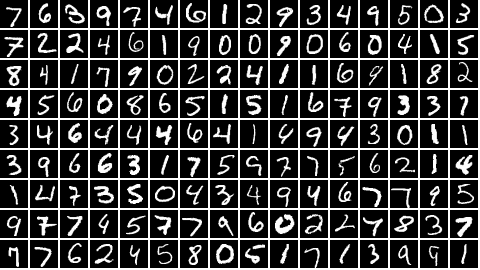

In [7]:
x_size, y_size = 16, 9
imgs = Image.new('RGBA', (30 * x_size, 30 * y_size))  # 打底背景
y = 0  # 照片坐标
for x in range(x_size*y_size):
    img = Image.fromarray(x_test[x].reshape(28, 28))
    imgs.paste(img, (x % x_size * 30, x % y_size * 30))  # 在打底背景上铺设照片
imgs

## 训练

In [20]:
# 神经网络结构
nn_architecture = [
    {"input_dim": 28*28, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 10, "activation": "softmax"},
]

In [21]:
# 当 NeuralNetwork 在 __init__.py 中时，不会重新加载，必须 nnet.py 中
reload(nnet)
nn = nnet.NeuralNetwork(nn_architecture, 55)

In [22]:
nn.reset_params()

In [23]:
nn.train(
    x_train, y_train, 100,
    new_train=True,
    batch_size=600, 
    batch_normalization=True,
    lr=0.002,
    gd_name='nadam'
)

开始训练，迭代次数：100
100
完成！用时：83.32364273071289s


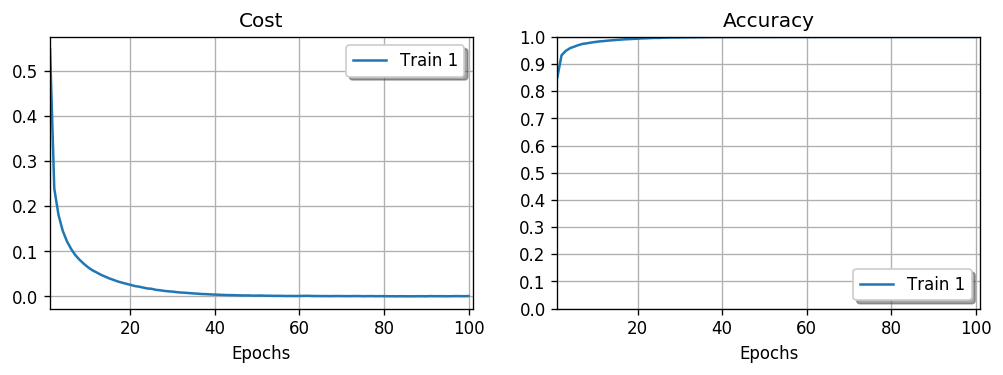

In [24]:
nn.plot_history()

In [25]:
nn.test_model(x_test, y_test)

0.9732

In [49]:
def show_diff(nn, x_test, y_test):
    x_test = x_test / 255.
    a = nn.predict(x_test)
    return a.argmax(axis=-1) != y_test.argmax(axis=-1)

In [50]:
x_diff = x_test[show_diff(nn, x_test, y_test)]

In [51]:
y_diff = y_test[show_diff(nn, x_test, y_test)]
y_diff.shape

(212, 10)

In [52]:
Image.fromarray(x_diff[1].reshape(28, 28))

In [53]:
y_diff[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

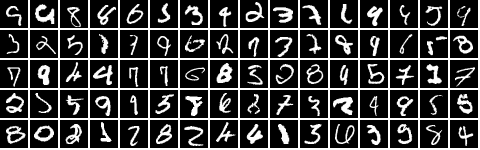

In [54]:
x_size, y_size = 16, 5
imgs = Image.new('RGBA', (30 * x_size, 30 * y_size))  # 打底背景
y = 0  # 照片坐标
for x in range(x_size*y_size):
    img = Image.fromarray(x_diff[x].reshape(28, 28))
    imgs.paste(img, (x % x_size * 30, x % y_size * 30))  # 在打底背景上铺设照片
imgs

In [86]:
y_diff[:10].argmax(axis=-1)

array([8, 2, 4, 6, 8, 2, 5, 6, 9, 3])

In [ ]:
y_